In [1]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import local_binary_pattern

In [2]:
img = cv2.imread('shiba.jpg')
cv2.imshow("test",img)
print(img.shape)
print(img.size)
cv2.waitKey(0)
cv2.destroyAllWindows()

(400, 500, 3)
600000


In [3]:
#1. LBP with Grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
length = gray.shape[1]
width = gray.shape[0]
print(length,width)
print(gray.size)
cv2.imshow("test",gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

500 400
200000


In [4]:
print(gray)
print(type(gray))

[[69 70 70 ... 75 74 74]
 [70 70 70 ... 75 75 74]
 [70 70 70 ... 75 74 74]
 ...
 [71 71 71 ... 68 67 67]
 [70 70 70 ... 67 67 67]
 [70 70 70 ... 67 67 67]]
<class 'numpy.ndarray'>


In [34]:
def get_value(a, b, img):
    return img[a][b]
def lbp(row_index, column_index, value, length, width,img ):
    neigbors_value = [-1]*8
    a = [None]*8
    a[0] = [row_index - 1, column_index - 1]
    a[1] = [row_index - 1, column_index ]
    a[2] = [row_index - 1, column_index + 1]
    a[3] = [row_index, column_index + 1]
    a[4] = [row_index + 1, column_index + 1]
    a[5] = [row_index + 1, column_index]
    a[6] = [row_index + 1, column_index - 1]
    a[7] = [row_index , column_index - 1]
    
    for i, x in enumerate(a):
        if x[0] == -1 or x[1] ==-1 or x[0] ==width or x[1] == length:
            neigbors_value[i]= 1
        else:
            v = get_value(x[0],x[1], img)
            if v>= value:
                neigbors_value[i] = 1
            else:
                neigbors_value[i] = 0
    return neigbors_value

def convert(a):
    b = [1, 2, 4, 8, 16, 32, 64, 128 ]
    s = 0
    for i,x in enumerate(a):
        s = s + int(x)*b[i]
    return s
def cal_lbp(gray):
    length = gray.shape[1]
    width = gray.shape[0]
    result = np.zeros((width,length))
    for i in range(0,width):
        for j in range(0,length):
            pixel_value = get_value(i,j,gray)
            neigbors_value = lbp(i,j,pixel_value,length,width,gray)
            lbp_value = convert(neigbors_value)
            result[i][j] = lbp_value
    return result

In [35]:
lbp_image = cal_lbp(gray)
cv2.imshow("lbp", lbp_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
out_scikit = local_binary_pattern(image=gray, P=8, R=1, method='default')
cv2.imshow("lbp", out_scikit)
cv2.waitKey(0)
cv2.destroyAllWindows()

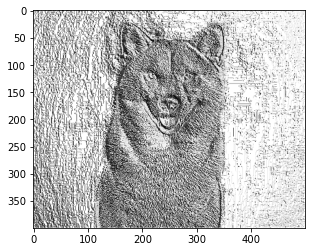

In [37]:
plt.imshow(lbp_image, cmap ="gray")
plt.show()

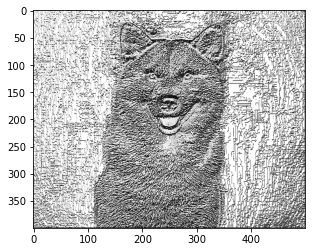

In [38]:
plt.imshow(out_scikit, cmap ="gray")
plt.show()

In [39]:
print(lbp_image)
print(out_scikit)

[[255. 127. 255. ... 247. 255. 255.]
 [253. 254. 255. ... 235. 193. 255.]
 [255. 255. 255. ... 231. 239. 223.]
 ...
 [207. 143. 159. ... 135. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
[[193. 193. 241. ... 112. 241. 112.]
 [193. 247. 255. ... 125.  16. 124.]
 [199. 255. 255. ... 124. 127.  28.]
 ...
 [  7.  31.  31. ...  28. 255. 124.]
 [199. 255. 255. ... 255. 255. 124.]
 [  7.  31.  31. ...  31.  31.  28.]]


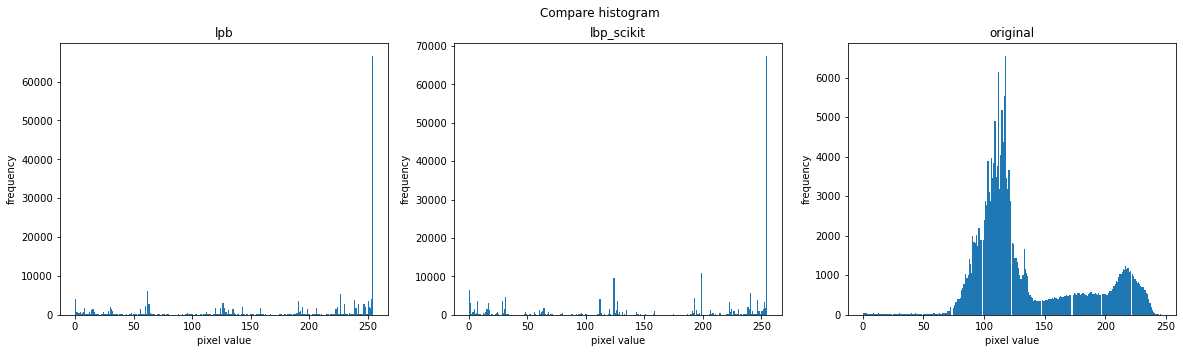

In [51]:
lbp_image = lbp_image.flatten()
gray = gray.flatten()
out_scikit = out_scikit.flatten()
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
fig.suptitle('Compare histogram')
ax1.hist(lbp_image, bins = 256)
ax1.set(title = "lpb", xlabel = "pixel value", ylabel = 'frequency')
ax2.hist(out_scikit, bins = 256)
ax2.set(title = "lbp_scikit", xlabel = "pixel value", ylabel = 'frequency')
ax3.hist(gray, bins = 256);
ax3.set(title = "original", xlabel = "pixel value", ylabel = 'frequency');

In [62]:
img2 = cv2.imread('shiba.jpg')
print(img2.shape)

(400, 500, 3)


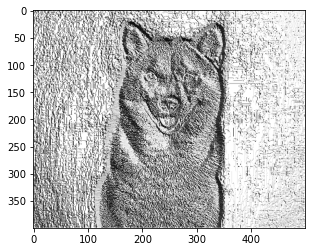

In [66]:
blue = img2[:,:,0]
blue_lbp  = cal_lbp(blue)
green = img2[:,:,1]
green_lbp  = cal_lbp(green)
red = img2[:,:,2]
red_lbp  = cal_lbp(red)
plt.imshow(blue_lbp, cmap ="gray")
plt.show()
